## Factors Affecting Life Expectancy
By Mahfuz Miah, September 24th, 2019

## 1. Synopsis
#### The goal in this challenge is to find the factors that affect the life expectancy. Specifically, we need to find out which factors increase the expected life in the countries and which factors decrease it.

## 2. Background
Below is an explanation of column headings from the document hosted by Kaggle named: Life Expectancy [https://www.kaggle.com/kumarajarshi/life-expectancy-who/home]

Column Definitions:

- Country - Country
- Year - Year
- Status - Developed or Developing status
- Life expectancy - Life Expectancy in age
- Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths - Number of Infant Deaths per 1000 population
- Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles - Measles - number of reported cases per 1000 population
- BMI Average - Body Mass Index of entire population
- under-five deaths - Number of under-five deaths per 1000 population
- Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP - Gross Domestic Product per capita (in USD)
- Population - Population of the country
- thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling - Number of years of Schooling(years)

## 3. Understanding and Preparing the Data Set

In [109]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.stats import jarque_bera
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [110]:
## load data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [111]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [113]:
#standardize names of columns

# Strip and make column names lowercase so that they are easy to manage. 
df.columns = df.columns.str.strip().str.lower()
# Replace characters or remove spaces and make all words lowercase.
df.columns = df.columns.str.replace('  ', '_').str.replace(' ', '_').str.replace('/', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')

In [114]:
# What's inside the file? Let's take a preview.
column_names = list(df.columns.values) 
print(column_names)

['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

## 4. Data preparation

### I. Handling missing data:
Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [115]:
life_df = df.copy() #rename df with new 

In [116]:
## Let's find the percent of empty entries in each column


def percentmissing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    #Below is code I used to check what the fractions were prior to trying to view with the dataframe version 
    #i = 0 
    #for x,y in zip(numer,denom):
    #    print (numer.index[i], ":", (Fraction(x,y)))
    #    i+=1

    #View results in dataframe
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],x,(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name','# Missing', 'Fraction Missing','Percent Missing'])
    return df1

percentmissing(life_df)

,Column_Name,# Missing,Fraction Missing,Percent Missing
0,country,0,0,0.000000
1,year,0,0,0.000000
2,status,0,0,0.000000
3,life_expectancy,10,5/1469,0.340368
4,adult_mortality,10,5/1469,0.340368
5,infant_deaths,0,0,0.000000
6,alcohol,194,97/1469,6.603131
7,percentage_expenditure,0,0,0.000000
8,hepatitis_b,553,553/2938,18.822328
9,measles,0,0,0.000000


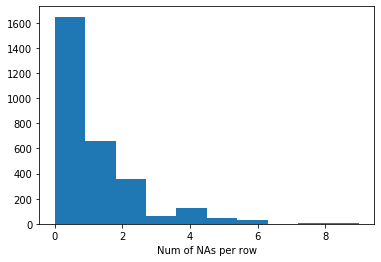

In [117]:
## Are there rows with multiple missing entries?
na_count = life_df.isnull().sum(axis=1) # sum up all the NAs by each row of the df
plt.hist(na_count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

In [118]:
size = life_df.shape[0]

(life_df.isnull().sum()/size*100).values

array([ 0.        ,  0.        ,  0.        ,  0.3403676 ,  0.3403676 ,
        0.        ,  6.60313138,  0.        , 18.82232811,  0.        ,
        1.15724983,  0.        ,  0.64669843,  7.69230769,  0.64669843,
        0.        , 15.24846835, 22.19196732,  1.15724983,  1.15724983,
        5.68413887,  5.54799183])

In [119]:
## Remove rows with more than 3 missing values; too many variables missing for a row suggests we will have
## to fill in too much data. Since the data won't be coming authentically from data collection, it may 
## be prudent to remove the rows, especially if we still are left with a large dataset.

# subset
life_df1 = life_df[na_count <= 3]
dropped = life_df.shape[0]-life_df1.shape[0]
print(f"{dropped} rows were dropped, which is only {100*dropped/life_df1.shape[0]}% of the total dataset")

208 rows were dropped, which is only 7.619047619047619% of the total dataset


In [120]:
# Let's see how much data we dropped by this method.

missingdf = percentmissing(life_df).join(percentmissing(life_df1), lsuffix='_before', rsuffix='_after')
missingdf['# Dropped'] = missingdf['# Missing_before'] - missingdf['# Missing_after']
missingdf

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Dropped
0,country,0,0,0.000000,country,0,0,0.000000,0
1,year,0,0,0.000000,year,0,0,0.000000,0
2,status,0,0,0.000000,status,0,0,0.000000,0
3,life_expectancy,10,5/1469,0.340368,life_expectancy,3,1/910,0.109890,7
4,adult_mortality,10,5/1469,0.340368,adult_mortality,3,1/910,0.109890,7
5,infant_deaths,0,0,0.000000,infant_deaths,0,0,0.000000,0
6,alcohol,194,97/1469,6.603131,alcohol,149,149/2730,5.457875,45
7,percentage_expenditure,0,0,0.000000,percentage_expenditure,0,0,0.000000,0
8,hepatitis_b,553,553/2938,18.822328,hepatitis_b,488,244/1365,17.875458,65
9,measles,0,0,0.000000,measles,0,0,0.000000,0


In [121]:
# Use pandas interpolation function to fill missing values since all categories 
# are floats or ints and because some linearity is noticed for each of the categories.
# We do notice that there tend to be values that may be type-os. These will be addressed 
# with outlier clean-up.

life_df2 = life_df1.copy()

fill_cols = life_df2.columns[life_df2.isnull().sum() > 0] # get a list of the columns that still have missing data
countries = life_df2['country'].unique() # get a list of the unique countries listed in the Country column


#interpolate values by country in both directions
for country in countries:
    life_df2.loc[life_df2['country'] == country, fill_cols] = life_df2.loc[life_df2['country'] == country, fill_cols].interpolate(method='linear', limit_direction='both')

In [122]:
life_df2

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [123]:
# Let's see how much data we have filled in by this method.

filleddf = percentmissing(life_df1).join(percentmissing(life_df2), lsuffix='_before', rsuffix='_after')
filleddf['# Filled'] = filleddf['# Missing_before'] - filleddf['# Missing_after']
filleddf

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Filled
0,country,0,0,0.000000,country,0,0,0.000000,0
1,year,0,0,0.000000,year,0,0,0.000000,0
2,status,0,0,0.000000,status,0,0,0.000000,0
3,life_expectancy,3,1/910,0.109890,life_expectancy,3,1/910,0.109890,0
4,adult_mortality,3,1/910,0.109890,adult_mortality,3,1/910,0.109890,0
5,infant_deaths,0,0,0.000000,infant_deaths,0,0,0.000000,0
6,alcohol,149,149/2730,5.457875,alcohol,1,1/2730,0.036630,148
7,percentage_expenditure,0,0,0.000000,percentage_expenditure,0,0,0.000000,0
8,hepatitis_b,488,244/1365,17.875458,hepatitis_b,128,64/1365,4.688645,360
9,measles,0,0,0.000000,measles,0,0,0.000000,0


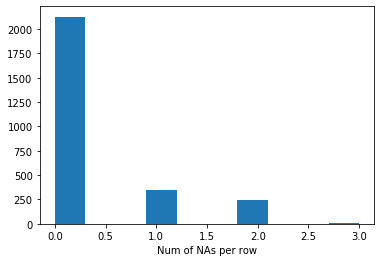

In [124]:
## Are there still rows with multiple missing entries?
na_count = life_df2.isnull().sum(axis=1) # sum up all the NAs by each row of the df
plt.hist(na_count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

We filled some of the data but 500+ entries are still not filled.

In [130]:
# Fill the rest of the missing NA with mean values for each country.
life_df3 = life_df2.copy()

for country in countries: 
    # countries was previously defined as the list of all countries in the original dataframe
    for col in fill_cols: 
        # fill_cols was previously defined as the list of columns that has NA values
        life_df3.loc[life_df3['country'] == country, col].fillna(life_df3.loc[life_df3['country'] == country, col].mean(),inplace=True)
        # replace all NaN with the mean for the column. This prevents the mean of the column 
        # being changed but gives a value to each NaN

life_df3.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [131]:
# Let's see how much data we have filled in by this method.

filleddf2 = percentmissing(life_df2).join(percentmissing(life_df3), lsuffix='_before', rsuffix='_after')
filleddf2['# Filled'] = filleddf2['# Missing_before'] - filleddf2['# Missing_after']
filleddf2

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Filled
0,country,0,0,0.000000,country,0,0,0.000000,0
1,year,0,0,0.000000,year,0,0,0.000000,0
2,status,0,0,0.000000,status,0,0,0.000000,0
3,life_expectancy,3,1/910,0.109890,life_expectancy,3,1/910,0.109890,0
4,adult_mortality,3,1/910,0.109890,adult_mortality,3,1/910,0.109890,0
5,infant_deaths,0,0,0.000000,infant_deaths,0,0,0.000000,0
6,alcohol,1,1/2730,0.036630,alcohol,1,1/2730,0.036630,0
7,percentage_expenditure,0,0,0.000000,percentage_expenditure,0,0,0.000000,0
8,hepatitis_b,128,64/1365,4.688645,hepatitis_b,128,64/1365,4.688645,0
9,measles,0,0,0.000000,measles,0,0,0.000000,0


This did not work - we still have NaN values. For now we will drop them.

In [137]:
na_count2 = life_df3.isnull().sum(axis=1) # sum up all the NAs by each row of the df
life_df4 = life_df3[na_count2 < 1]

In [138]:
# Let's see how much data we have filled in by this method.

filleddf3 = percentmissing(life_df3).join(percentmissing(life_df4), lsuffix='_before', rsuffix='_after')
filleddf3['# Filled'] = filleddf3['# Missing_before'] - filleddf3['# Missing_after']
filleddf3

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Filled
0,country,0,0,0.000000,country,0,0,0.0,0
1,year,0,0,0.000000,year,0,0,0.0,0
2,status,0,0,0.000000,status,0,0,0.0,0
3,life_expectancy,3,1/910,0.109890,life_expectancy,0,0,0.0,3
4,adult_mortality,3,1/910,0.109890,adult_mortality,0,0,0.0,3
5,infant_deaths,0,0,0.000000,infant_deaths,0,0,0.0,0
6,alcohol,1,1/2730,0.036630,alcohol,0,0,0.0,1
7,percentage_expenditure,0,0,0.000000,percentage_expenditure,0,0,0.0,0
8,hepatitis_b,128,64/1365,4.688645,hepatitis_b,0,0,0.0,128
9,measles,0,0,0.000000,measles,0,0,0.0,0


In [139]:
life_df4.describe(include='all')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2126,2126.000000,2126,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2.126000e+03,2126.000000,2126.000000,2126.000000,2126.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mongolia,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.497648,NaN,68.138758,174.281750,35.934149,4.351058,640.426119,74.291157,2659.873942,...,80.362653,5.899370,80.504233,2.175447,5405.496962,1.340972e+07,5.107667,5.177469,0.607505,11.694450
std,NaN,4.609835,NaN,9.614202,129.805426,136.284945,3.999015,1711.545584,28.771757,11917.581405,...,24.454764,2.305659,24.439327,5.829714,11381.032643,6.318620e+07,4.713234,4.806786,0.203436,3.201389
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.250000,NaN,62.000000,76.000000,1.000000,0.590000,19.977989,64.000000,0.000000,...,74.250000,4.360000,76.000000,0.100000,393.200909,1.989565e+05,1.600000,1.600000,0.477000,9.800000
50%,NaN,2007.500000,NaN,69.950000,152.000000,4.000000,3.615000,83.677991,87.000000,20.000000,...,91.000000,5.790000,91.000000,0.100000,1353.159574,1.427020e+06,3.400000,3.400000,0.649500,11.900000
75%,NaN,2011.000000,NaN,74.800000,241.000000,24.000000,7.125000,431.213022,95.000000,459.750000,...,96.000000,7.390000,96.000000,1.300000,4497.399863,7.805794e+06,7.500000,7.600000,0.747000,13.800000


In [ ]:
II. Handling outliers and transforming data